# ĐỒ ÁN THỰC HÀNH - NMKHDL

# Khám phá dữ liệu

## I. Tổng quan về bộ dữ liệu

### 1. Đọc dữ liệu và tính số dòng và cột

Đầu tiên ta import các thư viện cần thiết.

In [2]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
# .. import more libraries

import seaborn as sns
sns.set_theme()

# remove warnings
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import iplot
import plotly.io as pio
from scipy.spatial.distance import cdist

sns.set_style("white")
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
sns.set_context("poster",font_scale = .7)

palette = ["#11264e","#00507A","#026e90","#008b99","#6faea4","#fcdcb0","#FEE08B","#faa96e","#f36b3b","#ef3f28","#CC0028"]
palette_cmap=["#CC0028","#ef3f28","#f36b3b","#faa96e","#FEE08B","#fcdcb0","#6faea4","#008b99","#026e90","#00507A","#11264e"]


Tiếp đến đọc file `"chotot.csv"` vào dataframe `house_df` và in ra 5 dòng đầu tiên của dataframe.

In [3]:
house_df = pd.read_csv('chotot.csv')
house_df.head()

,DiaChi,GiaBan,DuAn,DienTich,TinhTrangBDS,Gia/m2,PhongNgu,PhongVeSinh,SoTang,TinhTrangGiayTo,TinhTrangNoiThat,HuongBanCong,HuongCua,DacDiem
0,"Đường Huy Cận, Phường Phước Long B (Quận 9 cũ)...","2,35 tỷ",The Art,66 m²,Chưa bàn giao,"35,61 triệu/m²",2 phòng,2 phòng,8.0,Đã có sổ,Nội thất cao cấp,Tây Bắc,Đông Bắc,NaN
1,"số 88, số 88 Đường N1, Phường Sơn Kỳ, Quận Tân...","3,42 tỷ",Celadon City,71 m²,Đã bàn giao,"48,17 triệu/m²",2 phòng,2 phòng,NaN,Đang chờ sổ,Nội thất cao cấp,NaN,NaN,NaN
2,"Võ Văn Kiệt, Phường An Lạc, Quận Bình Tân, Tp ...","2,4 tỷ",Akari City,56 m²,Đã bàn giao,"42,86 triệu/m²",2 phòng,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Bát Nàn, Phường Thạnh Mỹ Lợi (Quận 2 cũ), Thàn...","7,5 tỷ",One Verandah Mapletree,107 m²,Đã bàn giao,"70,09 triệu/m²",3 phòng,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Võ Văn Kiệt, Phường An Lạc, Quận Bình Tân, Tp ...","3,1 tỷ",Akari City,75 m²,Chưa bàn giao,"41,33 triệu/m²",2 phòng,2 phòng,NaN,NaN,NaN,NaN,NaN,NaN


Tính số dòng và số cột và lưu vào 2 biến `num_rows` và `num_cols`.

In [4]:
num_rows, num_cols = house_df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 1135
Number of columns: 14


### 2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Như đã được đề cập ở trên, dữ liệu được thu thập bằng cách crawl dữ liệu thô trên trang web 'https://www.nhatot.com/mua-ban-can-ho-chung-cu-tp-ho-chi-minh'. Mỗi dòng trong tập dữ liệu này tương ứng với một bản ghi các thông tin về căn hộ chung cư ở TP.HCM được đăng bán trên trang web 'chotot'. Bao gồm các thuộc tính như: địa chỉ, giá bán, dự án thầu, tình trạng bàn giao, số phòng ngủ, số phòng vệ sinh, giá/m2, căn hộ ở tầng mấy của chung cư, tình trạng giấy tờ, tình trạng nội thất, hướng ban công, hướng cửa chính, là căn góc hay trung tâm. Do vậy, ta có thể thấy rằng không có dòng nào bị "lạc loài".

### 3. Dữ liệu có các dòng bị lặp không?

Ta kiểm tra xem có dòng nào bị lặp không bằng cách sử dụng các phương thức `duplicated()` và `any()` trên dataframe `house_df` và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu ngược lại.

In [5]:
have_duplicate_rows = house_df.duplicated().any()
have_duplicate_rows

False

Do vậy, ta có thể thấy rằng dữ liệu không có các dòng bị lặp. Dễ thấy do thông tin các căn hộ được đăng bán là khác nhau và duy nhất cho một người chủ đăng bán.

### 4. Tỉ lệ giá trị thiếu và thống kê mô tả của từng cột

Ta cũng cần xem xét đến các giá trị thiếu trong dữ liệu. Đầu tiên, ta tính tỉ lệ giá trị thiếu của từng cột bằng cách sử dụng phương thức `isnull()` trên dataframe `house_df` và tính tổng số giá trị thiếu của từng cột bằng phương thức `sum()`. Cuối cùng ta chia số dòng và lưu kết quả vào `missing_ratio`.

In [6]:
missing_ratio = house_df.isnull().sum()
missing_ratio = missing_ratio / num_rows
missing_ratio

DiaChi              0.000000
GiaBan              0.000000
DuAn                0.000000
DienTich            0.000000
TinhTrangBDS        0.000881
Gia/m2              0.000000
PhongNgu            0.000000
PhongVeSinh         0.166520
SoTang              0.751542
TinhTrangGiayTo     0.496916
TinhTrangNoiThat    0.536564
HuongBanCong        0.748899
HuongCua            0.796476
DacDiem             0.824670
dtype: float64

- Có thể thấy, dữ liệu có rất nhiều thuộc tính bị thiếu và tỉ lệ thiếu khá lớn. Do vậy, việc tiền xử lý cho bộ dữ liệu này là vô cùng cần thiết.
- Sở dĩ việc có nhiều giá trị thiếu do mỗi người đăng thông tin lên web có các thông tin cho ngôi nhà khác nhau, và trang web không có một form bắt buộc cho các bài được đăng nên có những thông tin ngôi nhà này có cho biết nhưng ngôi nhà khác lại không cho biết.

Ta cũng cần tính các giá trị thống kê mô tả của các cột numeric bằng phương thức `describe()` trên dataframe `house_df`.

In [7]:
house_df.describe()

,SoTang
count,282.000000
mean,13.386525
std,20.639670
min,1.000000
25%,7.000000
50%,10.000000
75%,16.000000
max,321.000000


- Do hiện tại bộ dữ liệu chỉ có một cột SoTang là có kiểu dữ liệu numerical nên dùng phương thức describe() sẽ chỉ thống kê cho mỗi cột SoTang.
- Để xem thống kê cho các cột không phải dạng numerical ta phải gọi cụ thể cột đó.

In [8]:
cate_col_df=house_df.select_dtypes(exclude=['float64','float32','int64','int32'])
cate_col_df.describe()

,DiaChi,GiaBan,DuAn,DienTich,TinhTrangBDS,Gia/m2,PhongNgu,PhongVeSinh,TinhTrangGiayTo,TinhTrangNoiThat,HuongBanCong,HuongCua,DacDiem
count,1135,1135,1135,1135,1134,1135,1135,946,571,526,285,231,199
unique,452,330,311,173,2,866,5,5,3,4,8,8,1
top,"Số 4, Đào Trí, Phường Phú Thuận, Quận 7, Tp Hồ...","2,1 tỷ",Saigon Riverside Complex Q7,70 m²,Đã bàn giao,50 triệu/m²,2 phòng,2 phòng,Đã có sổ,Nội thất đầy đủ,Đông Nam,Tây Bắc,Căn góc
freq,39,40,44,43,929,16,785,687,370,210,77,40,199


Ví dụ với cột GiaBan:
- Có 1137 dòng.
- Có 330 giá trị khác nhau.
- Giá trị xuất hiện nhiều nhất là 2,1 tỷ với tần suất xuất hiện là 40 lần.

### 5. Kiểu dữ liệu của mỗi cột

Ta sử dụng phương thức `dtypes` trên dataframe `house_df` để xem kiểu dữ liệu của mỗi cột. Kết quả được lưu vào series `col_dtypes`; series này có index là tên các cột và giá trị là kiểu dữ liệu của các cột tương ứng.

In [9]:
col_dtype = house_df.dtypes
col_dtype

DiaChi               object
GiaBan               object
DuAn                 object
DienTich             object
TinhTrangBDS         object
Gia/m2               object
PhongNgu             object
PhongVeSinh          object
SoTang              float64
TinhTrangGiayTo      object
TinhTrangNoiThat     object
HuongBanCong         object
HuongCua             object
DacDiem              object
dtype: object

#### Nhận xét
- Về mặt kiểu dữ liệu, các thuộc tính của tập dữ liệu có nhiều cột đang ở định dạng chưa phù hợp, nên cần phải tiền xử lý ở giai đoạn này.

### 6. Thay đổi kiểu dữ liệu phù hợp cho các cột.

#### Nhận xét 1

- Các cột: **GiaBan, DienTich, Gia/m2, PhongNgu, PhongVeSinh** nên được đưa về kiểu dữ liệu numerical để tiếp tục xử lý.
- Về mặt thực tế những giá trị này là dạng số thực, và là những thuộc tính quan trọng liên quan đến giá căn hộ, do đó để thuận tiện cho việc áp dụng mô hình học máy thì nên đưa các cột này về dạng số.

**Cách xử lý:**
- Bước 1: Kiểm tra xem các giá trị trong cùng một thuộc tính có liệu có cùng một đơn vị hay không. Chỉ cần xem xét điều này với các thuộc tính: GiaBan, DienTich, Gia/m2.
- Bước 2: Nếu ở bước 1, các giá trị không cùng đơn vị với nhau thì ta sẽ tiến hành xử lý đưa về cùng đơn vị. Sau khi các giá trị trong các cột thuộc tính đã có cùng đơn vị với nhau thì ta sẽ xóa phần đơn vị, chỉ để lại phần giá trị số.

**Code bước 1:**

In [10]:
#xử lý cho cột 'Gia/m2'.
list_val1=house_df['Gia/m2'].values.tolist()
list_unit1=[]
for i in list_val1:
    list_unit1.append(i.split(" ",1)[1])
    
#Xử lý cho cột 'DienTich'
list_val2=house_df['DienTich'].values.tolist()
list_unit2=[]
for i in list_val2:
    list_unit2.append(i.split(" ",1)[1])  
    
#Xử lý cho cột 'GiaBan'
list_val3=house_df['GiaBan'].values.tolist()
list_unit3=[]
for i in list_val3:
    list_unit3.append(i.split(" ",1)[1])
    
print(f"Các đơn vị của cột 'Gia/m2':", set(list_unit1))
print(f"Các đơn vị của cột 'DienTich':", set(list_unit2))
print(f"Các đơn vị của cột 'GiaBan':", set(list_unit3))

Các đơn vị của cột 'Gia/m2': {'triệu/m²', 'tỷ/m²'}
Các đơn vị của cột 'DienTich': {'m²'}
Các đơn vị của cột 'GiaBan': {'tỷ', 'triệu'}


**Code bước 2:**

Ở đây chúng ta sẽ:
- Chuyển đơn vị cột 'GiaBan' về cùng đơn vị tỷ vnđ.
- Chuyển đơn vị cột 'Gia/m2' về cùng đơn vị triệu vnđ.
- Xóa đơn vị tiền của tất cả các cột (chỉ để lại giá trị số).

In [11]:
#xử lý cho 4 cột 'GiaBan', 'DienTich', 'PhongNgu', 'PhongVeSinh'.
vals=house_df[['GiaBan', 'DienTich', 'PhongNgu', 'PhongVeSinh']].values
list_vals=vals.tolist()
list_num_vals=[[str(float(str(l).split()[0].replace(',','.'))/(10**3)) if (len(str(l).split())>1) and ('triệu' in str(l).split()[1])
                else str(l).split()[0].replace(',','.') for l in lv] for lv in list_vals]
house_df[['GiaBan', 'DienTich', 'PhongNgu', 'PhongVeSinh']]=list_num_vals
#xử lý cho cột 'Gia/m2'.
list_val=house_df['Gia/m2'].values.tolist()
list_num_val=[str(float(str(l).split()[0].replace(',','.'))*(10**3)) if (len(str(l).split())>1) and ('tỷ' in str(l).split()[1])
                else str(l).split()[0].replace(',','.') for l in list_val]
house_df['Gia/m2']=list_num_val
house_df[['GiaBan', 'DienTich', 'Gia/m2', 'PhongNgu', 'PhongVeSinh']]=house_df[['GiaBan', 'DienTich', 'Gia/m2', 'PhongNgu', 'PhongVeSinh']].astype('float64')
house_df.head(3)

,DiaChi,GiaBan,DuAn,DienTich,TinhTrangBDS,Gia/m2,PhongNgu,PhongVeSinh,SoTang,TinhTrangGiayTo,TinhTrangNoiThat,HuongBanCong,HuongCua,DacDiem
0,"Đường Huy Cận, Phường Phước Long B (Quận 9 cũ)...",2.35,The Art,66.0,Chưa bàn giao,35.61,2.0,2.0,8.0,Đã có sổ,Nội thất cao cấp,Tây Bắc,Đông Bắc,NaN
1,"số 88, số 88 Đường N1, Phường Sơn Kỳ, Quận Tân...",3.42,Celadon City,71.0,Đã bàn giao,48.17,2.0,2.0,NaN,Đang chờ sổ,Nội thất cao cấp,NaN,NaN,NaN
2,"Võ Văn Kiệt, Phường An Lạc, Quận Bình Tân, Tp ...",2.40,Akari City,56.0,Đã bàn giao,42.86,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
print(f"Sau khi chuyển đổi kiểu dữ liệu, ta có kết quả:")
house_df.dtypes

Sau khi chuyển đổi kiểu dữ liệu, ta có kết quả:


DiaChi               object
GiaBan              float64
DuAn                 object
DienTich            float64
TinhTrangBDS         object
Gia/m2              float64
PhongNgu            float64
PhongVeSinh         float64
SoTang              float64
TinhTrangGiayTo      object
TinhTrangNoiThat     object
HuongBanCong         object
HuongCua             object
DacDiem              object
dtype: object

#### Nhận xét 2

Cột địa chỉ chứa các giá trị quá riêng biệt, không có ý nghĩa cho việc trực quan hay phân tích. Do đó lấy địa chỉ một cách tổng quát là quận/huyện/thành phố trực thuộc và thêm vào dataframe cột 'Quan'.

**Code:**

In [13]:
df = house_df.copy()
addr=[]
for i in range(0,len(df['DiaChi'])):
    a= df.DiaChi[i].split(',')
    temp=[]
    for j in a:
        if 'Huyện' in j:
            temp.append(j)
        if 'Quận' in j:
            temp.append(j)
        if 'Thủ Đức' in j:
            temp.append(j)
    addr=addr+[temp[-1]]
house_df['Quan']=addr
house_df.head(3)

,DiaChi,GiaBan,DuAn,DienTich,TinhTrangBDS,Gia/m2,PhongNgu,PhongVeSinh,SoTang,TinhTrangGiayTo,TinhTrangNoiThat,HuongBanCong,HuongCua,DacDiem,Quan
0,"Đường Huy Cận, Phường Phước Long B (Quận 9 cũ)...",2.35,The Art,66.0,Chưa bàn giao,35.61,2.0,2.0,8.0,Đã có sổ,Nội thất cao cấp,Tây Bắc,Đông Bắc,NaN,Thành phố Thủ Đức
1,"số 88, số 88 Đường N1, Phường Sơn Kỳ, Quận Tân...",3.42,Celadon City,71.0,Đã bàn giao,48.17,2.0,2.0,NaN,Đang chờ sổ,Nội thất cao cấp,NaN,NaN,NaN,Quận Tân Phú
2,"Võ Văn Kiệt, Phường An Lạc, Quận Bình Tân, Tp ...",2.40,Akari City,56.0,Đã bàn giao,42.86,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Quận Bình Tân


### 7. Xem xét sự phân bố giá trị của các cột dữ liệu dạng số.

**Trước khi xem xét sự phân bố, xem xét qua yếu tố sau đây:**
- Đối với cột GiaBan: Đa số giá trị được tính theo đơn vị là tỷ,nhưng sẽ có một số ít giá trị có đơn vị là triệu. Ví dụ giá trị lớn nhất thực tế là 130 tỷ nhưng vô tình giá trị 900 triệu nếu không được xử lý thì khi chuyển sang dạng số sẽ là giá trị lớn nhất. Từ việc này làm thay đổi min, max của cột dữ liệu do đó ta sẽ đổi tất cả giá trị theo đơn vị là triệu về tỷ.
- Tương tự dối với cột Gia/m2: Đa số giá trị được tính theo đơn vị là triệu,nhưng sẽ có một số ít giá trị có đơn vị là tỷ. Ví dụ giá trị nhỏ nhất thực tế là 1 triệu nhưng vô tình giá trị 0.8 tỷ nếu không được xử lý thì khi chuyển sang dạng số sẽ là giá trị nhỏ nhất. Từ việc này làm thay đổi min, max của cột dữ liệu do đó ta sẽ đổi tất cả giá trị theo đơn vị là triệu về triệu.

Ta thấy sau các bước tiền xử lý ở trên có 6 cột dữ liệu kiểu số là: GiaBan, DienTich, Gia/m2, PhongNgu, PhongVeSinh, SoTang.

Thực hiện thống kê trên 6 cột này và lưu vào một dataframe với các dòng là đại diện cho các giá trị như sau:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu (missing_ratio).
- Giá trị min (min).
- Giá trị lower quartile (phân vị 25) (lower_quartile).
- Giá trị median (phân vị 50) (median).
- Giá trị upper quartile (phân vị 75) (upper_quartile).
- Giá trị max (max).

In [14]:
numeric_df=house_df.copy()
numeric_df=numeric_df[['GiaBan', 'DienTich', 'Gia/m2', 'PhongNgu', 'PhongVeSinh']]
columns=list(numeric_df.columns)
titles=['missing_ratio', 'min', 'lower_quartile', 'median', 'upper_quartile', 'max']
arrays=numeric_df.to_numpy()
num_col_dict={}
num_col_vals=[]
for i in range(len(columns)):
    temp=[]
    temp.append(((sum(np.isnan(arrays[:,i]))/arrays.shape[0])*100).round(3))
    temp.append(np.nanmin(arrays[:,i],axis=0).round(1))
    temp.append(np.nanpercentile(arrays[:,i],25,axis=0).round(3))
    temp.append(np.nanpercentile(arrays[:,i],50,axis=0).round(3))
    temp.append(np.nanpercentile(arrays[:,i],75,axis=0).round(3))
    temp.append(np.nanmax(arrays[:,i],axis=0).round(3))
    num_col_vals.append(temp)
for i in range(len(columns)):
    num_col_dict[columns[i]]=num_col_vals[i]
    num_col_dict['titles']=titles
numeric_info_df=pd.DataFrame(num_col_dict).set_index('titles')
numeric_info_df

,GiaBan,DienTich,Gia/m2,PhongNgu,PhongVeSinh
titles,,,,,
missing_ratio,0.00,0.0,0.000,0.0,16.652
min,0.80,1.0,12.900,1.0,1.000
lower_quartile,1.83,58.0,28.770,2.0,2.000
median,2.42,69.0,37.140,2.0,2.000
upper_quartile,3.45,81.0,49.785,2.0,2.000
max,130.00,385.0,3290.000,5.0,5.000


**Nhận xét:**
- Đa số các cột dạng số không có giá trị thiếu, do những giá trị thuộc tính này là những giá trị rất cần thiết và thông dụng khi quan tâm đến việc mua một căn hộ, chỉ có thuộc tính PhongVeSinh có phần trăm giá trị thiếu lên đến hơn 16%.
- Việc bỏ đi các trường hợp có thuộc tính nan trong trường hợp này là không khả thi do mất đi quá nhiều dữ liệu và phần tiền xử lý này sẽ được thực hiện ở bước học máy.

### 8. Xem xét sự phân bố giá trị của các cột dữ liệu không phải dạng số.

Việc thực hiện thống kê sẽ không bao gồm cột DiaChi do đã có cột Quan làm đại diện.

Thực hiện thống kê và lưu vào một dataframe với các dòng có giá trị mang ý nghĩa như sau:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu (missing_ratio).
- Số lượng các giá trị khác nhau (không xét giá trị thiếu) (num_values).
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): dùng dictionary để lưu, key là giá trị, value là tỉ lệ % (value_ratios).

In [15]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

categorical_df=house_df[['Quan','DuAn','TinhTrangBDS','TinhTrangGiayTo','TinhTrangNoiThat',
                         'HuongBanCong','HuongCua','DacDiem']]
col_names=list(categorical_df.columns)
titles=["missing_ratio", "num_values", "value_ratios"]
values_list=[]
dic={}
for i in col_names:
    df=categorical_df.copy()[[i]]
    size=len(df)
    new=list(df[i].values)
    df[i]=new
    temp=[]
    temp.append(((df[i].isnull().sum()/size)*100).round(3))
    df.dropna(inplace=True)
    vals=list(df[i].values)
    num_vals=list(set(vals))
    temp.append(len(num_vals))
    temp2={}
    new=[(df[i].value_counts()[j]/len(vals)*100).round(3) for j in num_vals]
    temp2={num_vals[j]:new[j] for j in range(len(num_vals))}
    temp2_sort={k:v for k,v in sorted(temp2.items(), key= lambda item:item[1], reverse=True)}
    temp.append(temp2_sort)
    values_list.append(temp)
dic={col_names[i]:values_list[i] for i in range(len(col_names))}
dic['titles']=titles
categorical_info_df=pd.DataFrame(dic).set_index('titles')
categorical_info_df

,Quan,DuAn,TinhTrangBDS,TinhTrangGiayTo,TinhTrangNoiThat,HuongBanCong,HuongCua,DacDiem
titles,,,,,,,,
missing_ratio,0.0,0.0,0.088,49.692,53.656,74.89,79.648,82.467
num_values,19,311,2,3,4,8,8,1
value_ratios,"{' Thành phố Thủ Đức': 23.26, ' Quận 7': 15.242, ' Quận 8': 11.982, ' Quận Tân Phú': 7.489, ' Quận Bình Thạnh': 7.313, ' Quận Bình Tân': 6.432, ' Quận 4': 4.053, ' Huyện Nhà Bè': 3.789, ' Quận 12': 3.524, ' Quận Tân Bình': 3.084, ' Huyện Bình Chánh': 2.907, ' Quận 6': 2.731, ' Quận 10': 2.115, ' Quận Gò Vấp': 1.85, ' Quận Phú Nhuận': 1.233, ' Quận 11': 1.057, ' Quận 5': 0.969, ' Quận 1': 0.529, ' Quận 3': 0.441}","{'Saigon Riverside Complex Q7': 3.877, 'Celadon City': 2.819, 'Vinhomes Grand Park': 2.379, 'Topaz Elite': 2.203, 'Sunrise City': 2.026, 'Akari City': 1.938, 'Saigon Gateway': 1.85, 'Vinhomes Central Park': 1.674, 'Richmond City': 1.498, 'The Sun Avenue': 1.41, 'Võ Đình Apartment': 1.322, 'Ricca': 1.322, 'Dream Home Riverside': 1.145, 'Topaz City': 1.057, 'Eco Green Sài Gòn': 1.057, 'Orchid Park': 1.057, 'The Gold View': 1.057, 'Diamond Riverside (City Gate Towers 2)': 1.057, 'Lavita Charm': 1.057, 'The Pegasuite': 1.057, 'EHome 3': 1.057, 'Mizuki Park': 0.969, 'LuxGarden': 0.969, 'Sunview Town': 0.793, 'Sài Gòn Intela': 0.793, 'Green Town Bình Tân': 0.793, 'River Gate': 0.793, 'Hưng Ngân Garden': 0.705, 'Dream Home Palace': 0.705, 'Căn hộ RichStar': 0.705, 'Hà Đô Centrosa Garden': 0.705, 'The Everrich Infinity': 0.705, 'The Pegasuite 2': 0.705, 'Diamond Lotus Riverside': 0.617, 'City Garden': 0.617, 'Wilton Tower': 0.617, 'Căn hộ Cityland Parkhill Gò Vấp': 0.617, 'Kingdom 101': 0.617, 'Botanica Premier': 0.617, 'The Botanica': 0.617, 'Flora Novia': 0.529, '4S Riverside Linh Đông': 0.529, 'De Capella': 0.529, 'Q7 Boulevard': 0.529, 'Osimi Tower': 0.529, 'Jamona City': 0.529, 'Florita': 0.529, 'The Park Residence': 0.529, 'Empire City Thủ Thiêm': 0.529, 'Khu căn hộ IDICO Tân Phú': 0.529, 'The Origami – Vinhomes Grand Park': 0.529, 'Chung cư Lê Thành': 0.441, 'City Gate Towers': 0.441, 'Summer Square': 0.441, 'Starlight Riverside': 0.441, 'Đạt Gia Residence Thủ Đức': 0.441, 'Tara Residence': 0.441, 'Opal Riverside': 0.441, 'TaniBuilding Sơn Kỳ 1': 0.441, 'Central Premium': 0.441, 'The River Thủ Thiêm': 0.441, 'The Eastern': 0.441, 'Hoàng Anh Gold House (Hoàng Anh An Tiến)': 0.441, 'Sunrise Riverside': 0.441, 'Fresca Riverside': 0.441, 'Căn hộ DE LA SOL (Delasol)': 0.441, 'Him Lam Chợ Lớn': 0.441, 'Carina Plaza': 0.441, 'Masteri Thảo Điền': 0.441, 'An Gia Star': 0.441, 'M-One Nam Sài Gòn': 0.441, 'La Astoria': 0.441, 'The Western Capital': 0.352, 'Hưng Phát Silver Star': 0.352, 'Vinhomes Golden River BaSon': 0.352, 'Homyland 3 (Homyland Riverside)': 0.352, 'The Golden Star': 0.352, 'Conic Riverside': 0.352, 'One Verandah Mapletree': 0.352, 'Phú Hoàng Anh': 0.352, 'Jamila Khang Điền': 0.352, 'Central Plaza - 91 Phạm Văn Hai': 0.352, 'Docklands Sài Gòn': 0.352, 'Sadora Apartment': 0.352, 'Asiana Capella': 0.352, 'Riva Park': 0.352, 'The Tresor': 0.352, 'PiCity High Park': 0.352, 'Lavida Plus': 0.352, 'Viva Riverside': 0.352, 'Centum Wealth Complex': 0.352, 'Sky Garden 3': 0.352, 'Saigon Homes Bình Tân': 0.352, 'Sunrise CityView': 0.352, 'Lotus Sen Hồng ( Violet Tower )': 0.352, 'Topaz Garden': 0.352, 'Saigon Royal Residence': 0.352, '152 Điện Biên Phủ': 0.264, 'Lexington Residence': 0.264, 'Căn hộ D’Lusso': 0.264, ...}","{'Đã bàn giao': 81.922, 'Chưa bàn giao': 18.078}","{'Đã có sổ': 64.799, 'Đang chờ sổ': 29.422, 'Giấy tờ khác': 5.779}","{'Nội thất đầy đủ': 39.924, 'Hoàn thiện cơ bản': 33.08, 'Nội thất cao cấp': 25.285, 'Bàn giao thô': 1.711}","{'Đông Nam': 27.018, 'Đông Bắc': 14.386, 'Đông': 12.632, 'Nam': 10.877, 'Bắc': 10.526, 'Tây Bắc': 9.825, 'Tây Nam': 9.123, 'Tây': 5.614}","{'Đông Nam': 17.316, 'Tây Bắc': 17.316, 'Đông Bắc': 14.286, 'Tây': 12.121, 'Nam': 11.255, 'Tây Nam': 10.823, 'Bắc': 10.39, 'Đông': 6.494}",{'Căn góc': 100.0}


# Mô hình hóa bằng cách áp dụng thuật toán học máy

## I. Bài toán: DỰ ĐOÁN GIÁ BÁN CĂN HỘ CHUNG CƯ.

- Trong học máy, **học có giám sát** là một nhóm các thuật toán phổ biến trong lĩnh vực này và một trong những vấn đề quan trọng của học có giám sát là hồi quy(regression). Hồi quy là các bài toán liên quan đến việc dự đoán đầu ra có giá trị liên tục (predicting continous valued output).
- Và trong bài toán mà nhóm đề ra thì từ những cột thuộc tính đầu vào như diện tích căn hộ, số phòng ngủ, số phòng vệ sinh,.... Nhóm tiến hành dự đoán cột mục tiêu là giá bán của chung cư bằng thuật toán hồi quy tuyến tính (linear regression).

## II. Tiền xử lý bộ dữ liệu.

### 1. Chọn những thuộc tính có giá trị cho việc mô hình hóa.

- Như đã đề cập: Cột 'DiaChi' và 'DuAn' chứa các giá trị quá riêng biệt, không có ý nghĩa cho việc trực quan hay phân tích do đó các cột này sẽ không được lựa chọn làm thuộc tính đầu vào.
- Cột 'SoTang' thể hiện tầng mà căn hộ tọa lạc trong chung cư, cũng không được lấy do không có nhiều ý nghĩa.
- Do cột 'giá/m2' thật ra được tính bằng cách 'GiaBan'/'DienTich' nên cũng không có giái trị cho bài toán.
- Hầu như cột 'DacDiem' của bộ dữ liệu là nan hoặc 'căn góc' do đó cũng có thể loại bỏ thuộc tính này.
- Các cột của bộ dữ liệu được giữ lại bao gồm: 'GiaBan', 'DienTich', 'TinhTrangBDS', 'PhongNgu', 'PhongVeSinh', 'TinhTrangGiayTo', 'TinhTrangNoiThat', 'HuongCua', 'HuongBanCong', 'Quan'

In [16]:
new_df=house_df[['GiaBan', 'DienTich', 'TinhTrangBDS', 'PhongNgu', 'PhongVeSinh', 'TinhTrangGiayTo',
                 'TinhTrangNoiThat', 'HuongBanCong', 'HuongCua', 'Quan']]
new_df.head()

,GiaBan,DienTich,TinhTrangBDS,PhongNgu,PhongVeSinh,TinhTrangGiayTo,TinhTrangNoiThat,HuongBanCong,HuongCua,Quan
0,2.35,66.0,Chưa bàn giao,2.0,2.0,Đã có sổ,Nội thất cao cấp,Tây Bắc,Đông Bắc,Thành phố Thủ Đức
1,3.42,71.0,Đã bàn giao,2.0,2.0,Đang chờ sổ,Nội thất cao cấp,NaN,NaN,Quận Tân Phú
2,2.40,56.0,Đã bàn giao,2.0,NaN,NaN,NaN,NaN,NaN,Quận Bình Tân
3,7.50,107.0,Đã bàn giao,3.0,NaN,NaN,NaN,NaN,NaN,Thành phố Thủ Đức
4,3.10,75.0,Chưa bàn giao,2.0,2.0,NaN,NaN,NaN,NaN,Quận Bình Tân


## 2. Chuyển đổi các cột không phải dạng số về dạng số.

- Chuyển các cột 'TinhTrangBDS', 'TinhTrangGiayTo', 'TinhTrangNoiThat', 'HuongBanCong', 'HuongCua', 'Quan' về dạng số để làm đầu vào cho mô hình học máy, tuy nhiên các cột có dạng số này vẫn mang ý nghĩa phân loại.

In [17]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
new_df[['TinhTrangBDS', 'TinhTrangGiayTo', 'TinhTrangNoiThat', 'HuongBanCong',
      'HuongCua', 'Quan']]=enc.fit_transform(np.array(new_df[['TinhTrangBDS', 'TinhTrangGiayTo',
                                                            'TinhTrangNoiThat', 'HuongBanCong',
                                                            'HuongCua', 'Quan']]))
new_df[:13]

,GiaBan,DienTich,TinhTrangBDS,PhongNgu,PhongVeSinh,TinhTrangGiayTo,TinhTrangNoiThat,HuongBanCong,HuongCua,Quan
0,2.35,66.0,0.0,2.0,2.0,2.0,2.0,3.0,6.0,18.0
1,3.42,71.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,17.0
2,2.40,56.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,13.0
3,7.50,107.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,18.0
4,3.10,75.0,0.0,2.0,2.0,NaN,NaN,NaN,NaN,13.0
5,5.70,104.0,1.0,3.0,2.0,NaN,NaN,7.0,NaN,17.0
6,3.00,60.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,18.0
7,1.79,72.0,1.0,2.0,NaN,2.0,3.0,NaN,NaN,1.0
8,4.10,97.0,1.0,3.0,2.0,NaN,NaN,NaN,NaN,13.0
9,2.30,60.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,18.0


### 3. Xử lý các giá trị NaN.

- Đối với bộ dữ liệu này mỗi cột có số lượng giá trị thiếu khá nhiều do đó việc bỏ đi các dòng chứa giá trị nan có thể gây ảnh hưởng lớn đến tính chính xác khi tiến hành học trên bộ dữ liệu do thiếu thông tin.
- Giải pháp có thể sử dụng là thay thế giá trị NaN bằng các giá trị đặc biệt của cột dữ liệu chẳng hạn: trung bình, trung vị, most, ....
- Nhóm sẽ sử dụng giá trị trung vị để thay thế các giá trị NaN, do dữ liệu có thể có nhiều điểm ngoại lệ nên việc dùng giá trị mean có thể gây ra sai sót.

In [18]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
new_df=imputer.fit_transform(new_df)
new_df[:13]

array([[  2.35,  66.  ,   0.  ,   2.  ,   2.  ,   2.  ,   2.  ,   3.  ,
          6.  ,  18.  ],
       [  3.42,  71.  ,   1.  ,   2.  ,   2.  ,   1.  ,   2.  ,   5.  ,
          3.  ,  17.  ],
       [  2.4 ,  56.  ,   1.  ,   2.  ,   2.  ,   2.  ,   2.  ,   5.  ,
          3.  ,  13.  ],
       [  7.5 , 107.  ,   1.  ,   3.  ,   2.  ,   2.  ,   2.  ,   5.  ,
          3.  ,  18.  ],
       [  3.1 ,  75.  ,   0.  ,   2.  ,   2.  ,   2.  ,   2.  ,   5.  ,
          3.  ,  13.  ],
       [  5.7 , 104.  ,   1.  ,   3.  ,   2.  ,   2.  ,   2.  ,   7.  ,
          3.  ,  17.  ],
       [  3.  ,  60.  ,   1.  ,   2.  ,   1.  ,   2.  ,   2.  ,   5.  ,
          3.  ,  18.  ],
       [  1.79,  72.  ,   1.  ,   2.  ,   2.  ,   2.  ,   3.  ,   5.  ,
          3.  ,   1.  ],
       [  4.1 ,  97.  ,   1.  ,   3.  ,   2.  ,   2.  ,   2.  ,   5.  ,
          3.  ,  13.  ],
       [  2.3 ,  60.  ,   1.  ,   2.  ,   1.  ,   2.  ,   2.  ,   5.  ,
          3.  ,  18.  ],
       [  2.23,  90.  ,   1.  

Bây giờ đầu vào đã được tiền xử lý để phù hợp hơn cho việc áp dụng mô hình học máy.

## III. Xây dựng mô hình học máy.

### 1. Hồi quy tuyến tính đơn  biến (Univariable Linear Regression).

- Mục tiêu của hồi quy đơn biến là dự đoán giá trị của một biến phụ thuộc dựa vào một biến độc lập(hay còn gọi là thuộc tính).
- Trong bộ dữ liệu này chúng ta sẽ thử dự đoán giá bán của căn hộ chung cư (cột 'GiaBan') dựa vào thuộc tính diện tích của ngôi nhà (cột 'DienTich').

**Một vài ký hiệu**:
- X: tập thuộc tính đầu vào.
- y: tập giá trị đầu ra.
- ($x^{(i)}$, $y^{(i)}$): mẫu huấn luyện thứ i trong bộ dữ liệu

**Sơ đồ mô hình:**

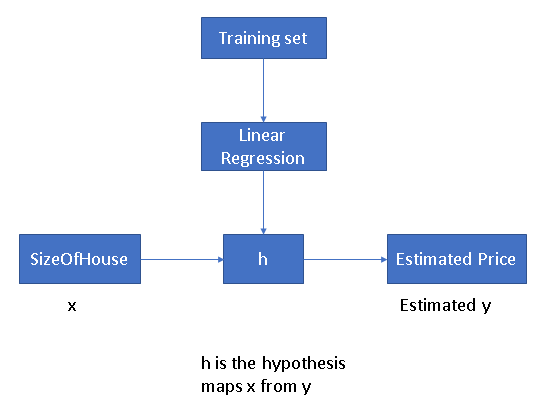

**Cost Function:**

- Ta có hypothesis là $h_{\theta}$(x): $\theta_{0}$ + $\theta_{1}$x với $\theta_{i}$ (i=0,1) là các tham số (parameters) của công thức hồi quy và $\theta_{0}$ còn đươc gọi là hệ số tự do.
- Tìm các $\theta_{i}$ để tạo ra đường thẳng phù hợp với dữ liệu (tạo ra $h_{\theta}$(x) càng gần y càng tốt).
- Để đánh giá xem hypothesis đã tốt hay chưa chúng ta xây dựng một hàm lỗi bình phương sum square error để tính toán độ sai lệch giữa giá trị dự đoán và giá trị thực tế.

**$$ J(\theta_{0}, \theta_{1}) = J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$**

Lúc này ta gọi $J(\theta)$ là 'Cost Function' với ý nghĩa là hàm chi phí đánh giá hiệu suất của hypothesis từ các tham số $\theta$.

Do càng gần y càng tốt nên giá trị của Cost Function càng nhỏ sẽ càng tốt.

Vậy làm thế nào để chọn được theta tốt cho hypothesis:
- Đầu tiên là khởi tạo theta với $\theta_{0}$=$\theta_{1}$=0 hoặc khởi tạo giá trị random cho các tham số đó.
- Phần lớn trường hợp Cost Function ban đầu sẽ có giá trị rất lớn do đó để giảm giá trị hàm chi phí thì cần có các giải pháp để tìm ra vector tham số theta phù hợp nhất cho hypothesis.
- Trong bài làm của nhóm sẽ sử dụng 2 cách là áp dụng thuật toán Gradient Descent và phương pháp Normal Equation.

**Gradient Descent:**

- Với hồi quy tuyền tính thì mục tiêu là cực tiểu hàm chi phí $$ J(\theta_{0}, \theta_{1}) = J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$ với $h_{\theta}(x)$ là đường thẳng tuyến tính.

- Các tham số $\theta_{j}$ sẽ là những giá trị mà chúng ta phải thay đổi để có thể tối ưu hóa Cost Function. Và trong thuật toán Gradient Descent cụ thể làm như sau:

**Trong mỗi lần lặp cập nhật một cách đồng thời các tham số $\theta_{j}$ theo công thức:**
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)}$$

Trong đó: alpha là 'learning rate' giúp việc học được tối ưu hơn.

**Vectorization:**

- Đối với các công thức trình bày bên trên sử dụng ký hiệu x là do minh họa cho một đầu vào. Nhưng khi làm việc với toàn bộ tập dữ liệu lớn thì việc lặp vòng lặp qua từng x trong bộ dữ liệu sẽ rất mất thời gian, do đó chúng ta sẽ tận dụng numpy để thực hiện các thao tác trên ma trận và truyền vào mô hình là những vector và ma trận. Bước này được gọi Vectorization (Ma trận hóa).
- Ký hiệu:
    + $\theta$: là vector tham số [$\theta_{0}$, $\theta_{1}$]
    + X là ma trận tất cả các mẫu đầu vào:
    [[1, $x^{1}$]
     [1, $x^{2}$]
     [...] 
     [1, $x^{m}$]] với m là kích thước bộ dữ liệu.
- 1 là được thêm vào mỗi đầu vào được gọi là bias.
- Hypothesis: $h_{\theta}$=X.$\theta$

**Cài đặt:**

Trực quan mối quan hệ giữa 2 biến 'DienTich' và 'GiaBan':

<AxesSubplot:xlabel='DienTich', ylabel='GiaBan'>

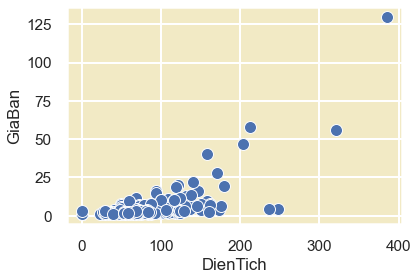

In [19]:
sns.scatterplot(data=house_df,x=house_df['DienTich'],y=house_df['GiaBan'])

Chưa thấy rõ mối quan hệ có thể do chênh lệch giá trị giữa 2 thuộc tính. Có thể cần feature scaling về sau.

Việc đầu tiên là lấy ra cột GiaBan và DienTich.

In [20]:
data=new_df[:,0:2]
data

array([[ 2.35, 66.  ],
       [ 3.42, 71.  ],
       [ 2.4 , 56.  ],
       ...,
       [ 2.2 , 83.5 ],
       [ 3.35, 69.  ],
       [ 1.68, 58.  ]])

In [21]:
X=data[:,1]
y=data[:,0]

In [22]:
#add bias unit.
X = np.stack([np.ones(len(X)), X], axis=1)

In [23]:
print(len(X), len(y))

1135 1135


Bước tiếp theo là **Phân tách bộ dữ liệu thành 2 tập training set và test set**:

- Mục đích: Bất cứ khi nào chúng ta đào tạo một mô hình học máy, chúng ta không thể đào tạo mô hình đó trên một tập dữ liệu hoặc thậm chí chúng ta đào tạo nó trên một tập dữ liệu duy nhất thì chúng ta sẽ không thể đánh giá hiệu suất của mô hình của mình do tập dữ liệu đã được mô hình học thuộc lòng thì việc đánh giá sẽ luôn đạt tỉ lệ đúng rất cao và có thể lên đến 100% dẫn đến hiện tượng over fitting - Không tổng quát khi áp dụng vào dữ liệu thực tế. Vì lý do đó, chúng ta chia dữ liệu nguồn của mình thành 2 tập training set và test set, nhiều bài viết cũng đề cập đến việc chia thành 3 tập là training, validation, và test set nhưng trong bài làm này nhóm sẽ chỉ chia thành 2 tập training và tets set.
- Kích thước mỗi tập như sau:
    + Size of Training set = 80% * (Size of Dataset).
    + Size of Test set = 20% * (Size of Dataset).

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
np.random.seed(13)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [26]:
print(len(X_train),len(y_train))

908 908


In [27]:
X_train[:5,:]

array([[  1., 385.],
       [  1.,  92.],
       [  1., 103.],
       [  1.,  70.],
       [  1.,  47.]])

In [28]:
print(len(X_test),len(y_test))

227 227


In [29]:
print(X_train.shape)
print(y_train.shape)

(908, 2)
(908,)


**Feature Scaling:**

- Khi khoảng giá trị giữa 2 thuộc tính quá cách xa nhau thì việc mô hình hóa cũng như trực quan mối quan hệ có thể gặp khó khăn, do đó phải thực hiện kĩ thuật 'Feature Scaling' hay việt hóa là 'Co giãn thuộc tính'.
- Có 2 phương pháp feature scaling chính là:
    + Standardisation (Chính quy hóa): Làm cho tập dữ liệu có trung bình là 0 và độ lệch chuẩn là 1 và được áp dụng cho hầu hết các trường hợp cần feature scaling.
    + Normalisation (Tiêu chuẩn hóa): Làm cho các giá trị trong tập dữ liệu thuộc đoạn [0, 1] và được áp dụng nếu tập dữ liệu tuân theo phân phối chuẩn.
- Trong bài này nhóm chọn phương pháp Standardisation để scaling khoảng giá trị của thuộc tính về khoảng gần hơn với giá trị của tập y là 'GiaBan'.

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [31]:
X_train[:,1]=sc.fit_transform(X_train[:,1].reshape(-1,1)).squeeze()

In [32]:
X_train[:5,:]

array([[ 1.        , 10.48173284],
       [ 1.        ,  0.63648024],
       [ 1.        ,  1.00609723],
       [ 1.        , -0.10275375],
       [ 1.        , -0.87558927]])

**Implementation Cost Function:**

In [34]:
def computeCostFunction(X, y, theta):
    m = y.size  # number of training examples
    
    # init the cost function's value is equal to 0.
    J = 0
    
    # compute cost function J.
    J=(1/(2*m))*np.sum(np.square(np.dot(X,theta.reshape(-1,1))-y.reshape(-1,1)),axis=0)

    return J

**Implement Gradient Descent:**

In [35]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]  # number of training examples
    
    theta = theta.copy()
    
    J_records = [] # to track value of J throw each iteration.
    
    for i in range(num_iters):
        temp=theta.copy()
        for j in range(len(theta)):
            theta[j]=temp[j]-alpha*(1/m)*np.sum((np.dot(X,temp.reshape(-1,1))-y.reshape(-1,1)).squeeze()*X[:,j])
        
        # save the cost J in every iteration
        J_records.append(computeCostFunction(X, y, theta))
    
    return theta, J_records

In [36]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1000
alpha = 0.01 #learning rate

theta, J_history = gradientDescent(X_train ,y_train, theta, alpha, iterations)

In [37]:
theta

array([3.44938583, 3.68088671])

Text(0, 0.5, 'Cost J')

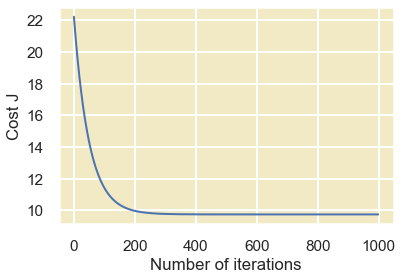

In [38]:
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

**Vẽ đường thẳng tuyến tính tốt nhất với tập dữ liệu:**

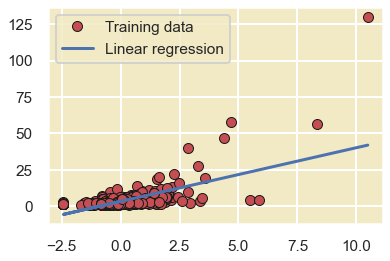

In [39]:
plt.plot(X_train[:,1],y_train,c='r',marker='o',ms=10,mec='k',ls='none');
plt.plot(X_train[:, 1], np.dot(X_train, theta), '-')
plt.legend(['Training data', 'Linear regression']);

In [40]:
X_test[:,1]=sc.transform(X_test[:,1].reshape(-1,1)).squeeze()

In [41]:
predictions=np.dot(X_test,theta).round(2)
dic={'Predictions': list(predictions), 'Real Values':list(y_test)}
df=pd.DataFrame(dic)

Trực quan việc so sánh giá trị dự đoán $h_{\theta}$(X) và y qua DataFrame 'df'.

In [117]:
#df

Ngoài việc tự cài đặt thì mô hình hồi quy tuyến tính cũng được xây dựng sẵn trong nhiều thư viện hỗ trợ của Python mà một trong số đó là Scikit Learn.

Thực hiện so sánh kết quả được dự đoán giữa mô hình tự cài đặt của nhóm và của thư viện sklearn.

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [44]:
predictions2=regr.predict(X_test)

In [45]:
dic2={'Predictions by Implementation': list(predictions), 'Predictions by Sklearn':list(predictions2.round(2))}
comparison_df=pd.DataFrame(dic2)

In [46]:
comparison_df

,Predictions by Implementation,Predictions by Sklearn
0,1.59,1.59
1,9.38,9.38
2,1.83,1.83
3,4.68,4.68
4,2.82,2.82
5,3.57,3.57
6,4.56,4.56
7,3.07,3.07
8,4.56,4.56
9,1.76,1.76


Như đã đề cập ở trên, nhóm sử dụng 2 cách để tìm ra theta tốt nhất cho hypothesis. Một là sử dụng Gradient Descent như đã đề cập ở trên, và cách thứ hai tiếp theo đây là sử dụng Normal Equation (Biểu thức chính quy).

**Normal Equation:**

Vector tham số $\theta$ sẽ được tính theo công thức sau: $$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$ với X và y lần lượt là ma trận đầu vào và vector của biến phụ thuộc như đã được đề cập ở mục **Vectorization** ở trên.

theta tốt nhất tìm được khi sử dụng gradient descent là array([3.44938583, 3.68088671]).

In [47]:
def normalEquation(X, y):
    theta = np.zeros(X.shape[1])
    
    theta=np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y.reshape(-1,1))
    theta=theta.squeeze()

    return theta

In [49]:
theta = normalEquation(X_train, y_train)
theta

array([3.44953475, 3.68104562])

Nhận thấy sai số là rất ít giữa 2 phương pháp.

**So sánh giữa Gradient Descent và Normal Equation:**

| Gradient Descent | Normal Equation |
| :- | -: |
| Cần lựa chọn $\alpha$ phù hợp | Không cần lựa chọn $\alpha$ |
| Cần nhiều vòng lặp | Không cần nhiều vòng lặp |
| Làm việc tốt thậm chí với tập dữ liệu có kích thước rất lớn | Rất chậm với tập dữ liệu có kích thước rất lớn do cần tính $(X^{T}X)^{-1}$  |

## 2. Hồi quy tuyến tính đa biến (Linear Regression with Multi Variables).